In [51]:
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from math import pi,exp

In [103]:
res_sample = '20140415_1645Z.nc'
ci = xr.open_dataset(res_sample).data_vars['ci']
data = ci.values[1,0]
(dimy,dimx) = data.shape
dbuf = np.full((dimy+6,dimx+6),np.nan)
ones = np.full((dimy+6,dimx+6),np.nan)
crs = np.zeros_like(data)
for i in range(dimy):
    dbuf[i+3][3:-3] = data[i]
    ones[i+3][3:-3] = np.ones_like(data[i])

In [104]:
# create mask (Gaussian)
m = np.zeros((7,7))
var = 2
for i in range(7):
    for j in range(7):
        m[i,j] = exp(-((i-3)**2+(j-3)**2)/(2*var))
m = m/m[3,3]
print(m)

[[0.011109   0.03877421 0.082085   0.10539922 0.082085   0.03877421
  0.011109  ]
 [0.03877421 0.13533528 0.2865048  0.36787944 0.2865048  0.13533528
  0.03877421]
 [0.082085   0.2865048  0.60653066 0.77880078 0.60653066 0.2865048
  0.082085  ]
 [0.10539922 0.36787944 0.77880078 1.         0.77880078 0.36787944
  0.10539922]
 [0.082085   0.2865048  0.60653066 0.77880078 0.60653066 0.2865048
  0.082085  ]
 [0.03877421 0.13533528 0.2865048  0.36787944 0.2865048  0.13533528
  0.03877421]
 [0.011109   0.03877421 0.082085   0.10539922 0.082085   0.03877421
  0.011109  ]]


In [105]:
#i=0; j=0;
#print((dbuf[i:i+7,j:j+7]))

for i in range(dimy):
    for j in range(dimx):
        data_sum = np.nansum(np.multiply(dbuf[i:i+7,j:j+7],m))
        weight_sum = np.nansum(np.multiply(ones[i:i+7,j:j+7],m))
        crs[i,j] = data_sum/weight_sum
print(crs)

[[0.01724993 0.01678073 0.01615858 ... 0.01173075 0.01333058 0.01465531]
 [0.01677335 0.0163327  0.01578476 ... 0.01020366 0.01165039 0.01290293]
 [0.01591984 0.01553141 0.01511696 ... 0.00883797 0.01012944 0.01129773]
 ...
 [0.03837363 0.03989836 0.04039316 ... 0.01748648 0.01821919 0.01881305]
 [0.0371637  0.03843566 0.03863334 ... 0.01835975 0.01892037 0.01935164]
 [0.03585284 0.03687125 0.03678048 ... 0.01915408 0.01952393 0.01979421]]


In [106]:
yint = 57
xint = 41
crs_atint = np.zeros((yint,xint))
for y in range(yint):
    for x in range(xint):
        crs_atint[y,x] = crs[4*y,4*x]


In [89]:
print(ci)

<xarray.DataArray 'ci' (time: 5, ensemble_number: 20, south_north: 225, west_east: 161)>
array([[[[ 0.018307, ..., -0.007778],
         ...,
         [ 0.022162, ...,  0.002448]],

        ...,

        [[ 0.018307, ..., -0.007778],
         ...,
         [ 0.022162, ...,  0.002448]]],


       ...,


       [[[ 0.01042 , ...,  0.046399],
         ...,
         [ 0.019161, ...,  0.021012]],

        ...,

        [[ 0.016329, ...,  0.076041],
         ...,
         [ 0.018997, ...,  0.011338]]]], dtype=float32)
Coordinates:
  * west_east        (west_east) float32 240.0 240.25 240.5 ... 279.75 280.0
  * south_north      (south_north) float32 32.0 32.25 32.5 ... 87.5 87.75 88.0
  * time             (time) datetime64[ns] 2014-04-15T16:45:00 ... 2014-04-15T17:45:00
  * ensemble_number  (ensemble_number) uint32 0 1 2 3 4 5 ... 14 15 16 17 18 19
Attributes:
    we_er_min:  240
    we_er_max:  280
    sn_er_min:  32
    sn_er_max:  88


In [90]:
np.arange(240.0,281.0)

array([240., 241., 242., 243., 244., 245., 246., 247., 248., 249., 250.,
       251., 252., 253., 254., 255., 256., 257., 258., 259., 260., 261.,
       262., 263., 264., 265., 266., 267., 268., 269., 270., 271., 272.,
       273., 274., 275., 276., 277., 278., 279., 280.])

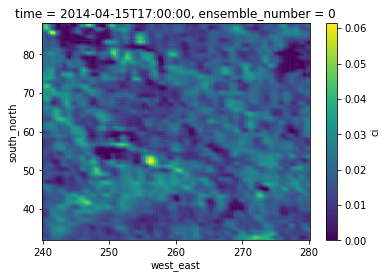

In [107]:
ci[1,0,:,:].plot()
plt.show()

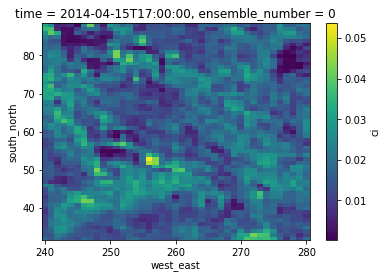

In [108]:
res_ci = xr.open_dataarray('20140415_1645Z_crs_gauss.nc')
res_ci[1,0,:,:].plot()
plt.show()
res_ci.close()

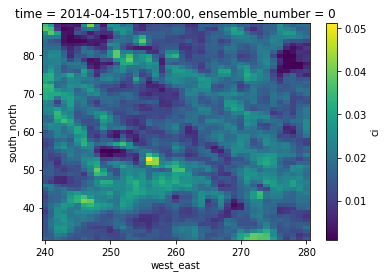

In [118]:
res_ci = xr.open_dataarray('20140415_1645Z_crs_gauss.nc')
res_ci[1,0,:,:].plot()
plt.show()
res_ci.close()

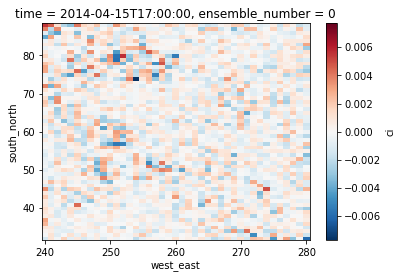

In [117]:
(res_ci[1,0,:,:]-ci[1,0,:,:]).plot()
plt.show()